In [15]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
print(pd.__version__)

2.3.1


We want to bring all the variables in the range 0-1, this aids faster convergence

In [16]:
data = pd.read_csv('loan_data.csv')
data.head()
data.shape

(614, 13)

In [17]:
data.isnull().sum()
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
# filling missing values of categorical variables with mode

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

/var/folders/p7/qb0q8b215dncp0tf2qjg_t240000gn/T/ipykernel_97403/208805764.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
/var/folders/p7/qb0q8b215dncp0tf2qjg_t240000gn/T/ipykernel_97403/208805764.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

In [19]:
# filling missing values of continuous variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

/var/folders/p7/qb0q8b215dncp0tf2qjg_t240000gn/T/ipykernel_97403/585694403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)


In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
# converting the categories into numbers using map function
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

To convert the values between 0-1 we need to normalise within that range, so we need to divide by the range so the denominator = X_max-X_min and the numerator is the positive value from the minimum as a reference as our 0/origin so we need to do X - X_min

In [22]:
data['Dependents']=(data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [23]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [24]:
data.to_csv('loan_prediction_data.csv', index=False)

In [25]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [26]:
data = pd.read_csv('loan_prediction_data.csv')
# separating the independent and dependent variables

X = data.drop('Loan_ID',axis=1)
# storing all the independent variables as X
X = X.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.000000,1.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,0.0,1.0,1.000000,1.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,0.0,1.0,0.333333,1.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,0.0,1.0,0.666667,1.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [27]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)
print(X_train)

     Gender  Married  ...  Credit_History  Property_Area
164     0.0      1.0  ...             1.0            1.0
171     0.0      1.0  ...             1.0            1.0
546     0.0      0.0  ...             1.0            0.5
226     0.0      1.0  ...             1.0            1.0
176     0.0      1.0  ...             1.0            0.0
..      ...      ...  ...             ...            ...
560     0.0      1.0  ...             1.0            0.5
503     0.0      1.0  ...             1.0            0.0
343     0.0      1.0  ...             1.0            0.5
148     1.0      0.0  ...             1.0            0.0
303     0.0      1.0  ...             1.0            1.0

[491 rows x 11 columns]


In [ ]:
import tensorflow as tf
from sklearn.model_selection import LearningCurveDisplay
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from scipy import optimize
from keras import Input, Model
from keras.initializers import random_normal, glorot_normal, he_normal
from keras.layers import concatenate
import skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import resize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
from math import e
from keras.layers import Dropout
from numpy import empty, number
print(tf.__version__)

2.19.0


In [ ]:

input_neurons =X_train.shape[1] # number of features in the data
#print(input_neurons)
# we are wanting binay data so:
output_neurons = 1
number_of_hidden_layers = 2
nhl1 = 10
nhl2 = 5

model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=nhl1, activation='sigmoid'))
model.add(Dense(units=nhl2, activation='sigmoid'))
model.add(Dense(units=output_neurons, activation='linear'))
model.summary()
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

#print(input_neurons*nhl1 + 10)

/Users/jj/Scripts/py_scripts/AIProject/ACTUALPENDULUMPROJECT/ANN/ANNs/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:



model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='Adam')
# Adam is a stochastic gradient descent which uses both an adaptive learning rate and momentum
# and I want to see the accuracy

history1 = model.fit(X_train,y_train,epochs=200,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3760 - loss: 10.0570 - val_accuracy: 0.3089 - val_loss: 11.1385
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3294 - loss: 10.8094 - val_accuracy: 0.3089 - val_loss: 11.1385
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3223 - loss: 10.9231 - val_accuracy: 0.3089 - val_loss: 11.1385
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3465 - loss: 10.5336 - val_accuracy: 0.3089 - val_loss: 11.1385
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3430 - loss: 10.5892 - val_accuracy: 0.3089 - val_loss: 11.1385
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3274 - loss: 10.8411 - val_accuracy: 0.3089 - val_loss: 11.1385
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3209 - loss: 10.9460 - val_accuracy: 0.3089 - val_loss: 11.1385
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3123 - loss: 11.0847 - val_accur

In [31]:
prediction = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


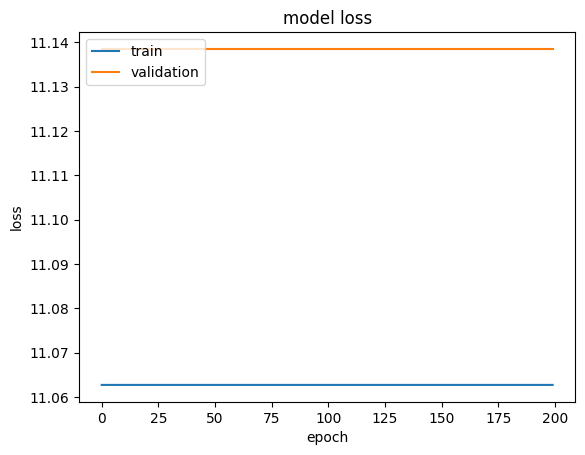

In [32]:
prediction = np.where(model.predict(X_test)>0.5,1,0)
accuracy_score(y_test,prediction)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# This be overfitting

In [ ]:

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.0005)
EarlyStop = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.001, patience=10)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history3 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStop])

Epoch 1/100


/Users/jj/Scripts/py_scripts/AIProject/ACTUALPENDULUMPROJECT/ANN/ANNs/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3381 - loss: 0.8139 - val_accuracy: 0.3984 - val_loss: 0.7231
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - loss: 0.6975 - val_accuracy: 0.6911 - val_loss: 0.6490
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6827 - loss: 0.6384 - val_accuracy: 0.6911 - val_loss: 0.6194
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - loss: 0.6177 - val_accuracy: 0.6911 - val_loss: 0.6081
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - loss: 0.6004 - val_accuracy: 0.6911 - val_loss: 0.6014
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7019 - loss: 0.5788 - val_accuracy: 0.6911 - val_loss: 0.5952
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7048 - loss: 0.5791 - val_accuracy: 0.6911 - val_loss: 0.5888
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7158 - loss: 0.5709 - val_accuracy: 0.6911 - val_loss: 0.

In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}') # and this is pretty good too, this is definitely not overfitting as much - but still overfitting lol (look at the val_loss graph)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8210 - loss: 0.5096 
Test accuracy: 0.813


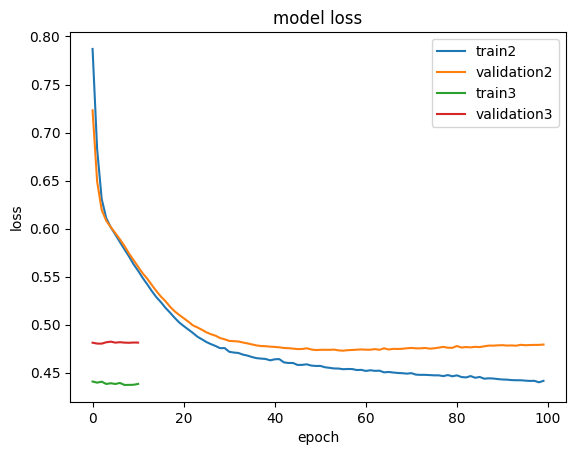

In [37]:
# plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])
# the first model is pretty shit
# this model 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['train2', 'validation2', 'train3', 'validation3'], loc='upper right')
# this one is just overfit
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

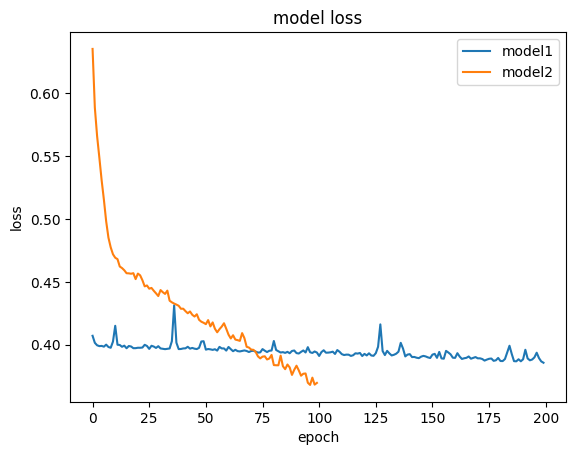

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model1', 'model2'], loc='upper right')
plt.show()

In [ ]:
# defining the architecture of the model using Functional API

x = Input(shape = (input_neurons,))
hidden1 = Dense(units=nhl1, activation='relu')(x)
hidden2 = Dense(units=nhl2, activation='relu')(x)

combined = concatenate([hidden1, hidden2])

hidden2 = Dense(units=nhl2, activation='relu')(combined)
output = Dense(units=output_neurons, activation='sigmoid')(hidden2)

modelFunctional = Model(x, output)
modelFunctional.summary()

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 10)        │        120 │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 5)         │         60 │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 15)        │          0 │ dense_50[0][0],   │
│ (Concatenate)       │                   │            │ dense_51[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_52 (Dense)    │ (None, 5)         │         80 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_53 (Dense)    │ (None, 1)         │          6 │ dense_52[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 266 (1.04 KB)

 Trainable params: 266 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
image = imread('Labrador_Retriever_portrait.jpg')
image
#imshow(image)

array([[[218, 213, 219],
        [217, 212, 218],
        [217, 212, 218],
        ...,
        [161, 160, 174],
        [161, 160, 174],
        [160, 159, 173]],

       [[217, 212, 218],
        [216, 211, 217],
        [216, 211, 217],
        ...,
        [161, 160, 174],
        [161, 160, 174],
        [161, 160, 174]],

       [[216, 211, 217],
        [216, 211, 217],
        [215, 210, 216],
        ...,
        [161, 160, 174],
        [161, 160, 174],
        [161, 160, 174]],

       ...,

       [[ 34,  29,  35],
        [ 35,  30,  36],
        [ 35,  30,  36],
        ...,
        [142, 114, 111],
        [142, 114, 111],
        [143, 115, 112]],

       [[ 35,  30,  36],
        [ 35,  30,  36],
        [ 35,  30,  36],
        ...,
        [141, 113, 110],
        [142, 114, 111],
        [142, 114, 111]],

       [[ 35,  30,  36],
        [ 35,  30,  36],
        [ 35,  30,  36],
        ...,
        [141, 113, 110],
        [142, 114, 111],
        [141, 113, 110]]

In [ ]:
image_gray = skimage.color.rgb2gray(image)
imshow(image_gray)


Now we tried to prevent overfitting using early stopping, however this doesnt actually stop the overfitting, instaed we can use dropout Regularization.
Recall overfitting occurs when the neurons just remember the data rather than generalising.
We can use dropout regularization and give certian layers a dropout chance e.g. if give a layer of dropout probability of 0.5, then each neuron in the layer has a 50% chance of being randomly dropped (removed)
We could also give a chance of making a new connection.

In [ ]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


0: Airplane
1: Automobile
2: Bird
3: Cat
4: Deer
5: Dog
6: Frog
7: Horse
8: Ship
9: Truck

In [ ]:



# print(x_train.shape)
# plt.imshow(x_train[41])
# print(y_train[41])
def vectorisedata(y):
    newdata = []
    for i in range(0,len(y)):
        e_y = np.zeros((10,1))
        e_y[y[i]] = 1
        newdata.append(e_y)
    return newdata

y_trainvectorised = np.array(vectorisedata(y_train))
y_testvectorised = np.array(vectorisedata(y_test))
# print(y_trainvectorised[41],y_train[41])
x_train_flat = x_train.reshape(50000, -1) # the -1 means that the number of columns is calculated automatically
x_test_flat = x_test.reshape(10000, -1)
x_train_flat.shape





(50000, 3072)

In [ ]:

model = Sequential()
model.add(InputLayer(shape=(32*32*3,)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 312,860 (1.19 MB)

 Trainable params: 312,860 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.001, clipvalue=0.5) # so any gradient greater than 0.5 will be clipped (i.e. set to 0.5)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

modelHistory = model.fit(x_train_flat, y_trainvectorised, epochs=200, batch_size=32, validation_data=(x_test_flat, y_testvectorised))

Epoch 1/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0822 - loss: 2.3310 - val_accuracy: 0.0000e+00 - val_loss: 2.3029
Epoch 2/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0841 - loss: 2.3039 - val_accuracy: 0.0000e+00 - val_loss: 2.3027
Epoch 3/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0927 - loss: 2.3030 - val_accuracy: 0.0000e+00 - val_loss: 2.3027
Epoch 4/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0214 - loss: 2.3031 - val_accuracy: 0.0000e+00 - val_loss: 2.3028
Epoch 5/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1495 - loss: 2.3029 - val_accuracy: 0.9000 - val_loss: 2.3027
Epoch 6/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6481 - loss: 2.3028 - val_accuracy: 0.0000e+00 - val_loss: 2.3027
Epoch 7/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0226 - loss: 2.3028 - val_accuracy: 0.0000e+00 - val_loss: 2.3027
Epoch 8/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - ac

When there are more layers you have a bigger risk of vanishing/exploding gradients, consider one with 5 layers, changing a weight on just one on the first layer if the error is small then this could lead to a vanishing gradient as the weight would be updated with a small change which would mean its similar to how it was before which just made a small change.
however if the gradient is large then the change in the weight will be large however this could lead to large fluctuations and potentially exponential growth leading to an exploding gradient.
its worse with more layers as there will be more derivatives of the activation functions which typically only have values between 0 and 1 so will just get smaller and smaller, 

using ReLU helps as it has a gradient of 1 for positive values so stops them vanishing with many layers.

to stop exploding gradient we should initialise sensible weights and biases or dont choose activation functions with gradients greater than 1.
To solve: we can do gradient clipping (max of mod(grad) = 1) so if above the max we clip to 1/-1 for example
and 'sensible initialisations' could be random uniform between -1 and 1 or a Xavier / Glorot Normal Initialization
so a N(0,srqt(2/fan_in + fan_out)) (fan_in = number of input neurons and fan_out = number of output neurons)
or a He Normal: N(0,sqrt(2/fan_in))

Batch Normalization:
normalise the inputs/layers